In [88]:
# Import necessary libraries
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler


In [89]:
# Set up the directories
current_dir = os.getcwd()
base_dir = os.path.join('..', 'Clean-Image-Dataset')
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

# Check if the directories exist
if not os.path.exists(train_dir):
    raise ValueError(f"Directory '{train_dir}' not found.")
if not os.path.exists(test_dir):
    raise ValueError(f"Directory '{test_dir}' not found.")




In [90]:
## 1. Prepare your environment and dataset

# Load the training data
X_train = []
y_train = []
for person_dir in os.listdir(train_dir):
    person_path = os.path.join(train_dir, person_dir)
    if os.path.isdir(person_path):
        for img_file in os.listdir(person_path):
            img_path = os.path.join(person_path, img_file)
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.resize(img, (100, 100))  # Resize the image to a fixed size
                X_train.append(img)
                y_train.append(person_dir)

# Load the test data
X_test = []
y_test = []
for person_dir in os.listdir(test_dir):
    person_path = os.path.join(test_dir, person_dir)
    if os.path.isdir(person_path):
        for img_file in os.listdir(person_path):
            img_path = os.path.join(person_path, img_file)
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.resize(img, (100, 100))  # Resize the image to a fixed size
                X_test.append(img)
                y_test.append(person_dir)


In [91]:
# Convert the data to numpy arrays
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)


In [92]:
## 2. Train a face recognition model using a machine learning algorithm

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.reshape(len(X_train), -1))
X_test_scaled = scaler.transform(X_test.reshape(len(X_test), -1))

In [93]:
# Train a nearest neighbors model
neigh = NearestNeighbors(n_neighbors=1)
neigh.fit(X_train_scaled)



NearestNeighbors(n_neighbors=1)

In [97]:
## 3. Implement face detection using OpenCV's Haar cascades

# Load the pre-trained Haar cascade classifier
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Function to detect and extract faces from an image
def detect_faces(image):
    if image is None or image.size == 0:
        return []
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
    return faces

In [ ]:
## 4. Apply the trained face recognition model to detect and identify faces in real-time

# Function to recognize and label faces in an image
def recognize_faces(image, neigh, scaler):
    faces = detect_faces(image)
    for (x, y, w, h) in faces:
        roi_gray = cv2.resize(image[y:y+h, x:x+w], (100, 100))
        roi_gray_flat = roi_gray.flatten()
        roi_gray_scaled = scaler.transform([roi_gray_flat])
        distances, indices = neigh.kneighbors(roi_gray_scaled)
        name = y_train[indices[0][0]]
        cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
        cv2.putText(image, name, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (36, 255, 12), 2)
    return image

# Test the face recognition on a sample image
sample_image_name = 'tom_cruise_test_1.jpg'
sample_image_path = os.path.join(test_dir, 'tom_cruise', sample_image_name)
if os.path.exists(sample_image_path):
    sample_image = cv2.imread(sample_image_path)
    if sample_image is not None:
        recognized_image = recognize_faces(sample_image, neigh, scaler)
        cv2.imshow('Recognized Faces', recognized_image)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
    else:
        print("Error: Unable to load the sample image.")
else:
    print("Error: Sample image file not found.")

In [ ]:
## 6. Optimize the accuracy and performance of your system

# Evaluate the model's performance on the test set
distances, indices = neigh.kneighbors(X_test_scaled)
accuracy = np.mean([y_train[idx[0]] == y_test[i] for i, idx in enumerate(indices)])
print(f'Accuracy on the test set: {accuracy:.2f}')

# Explore ways to improve the model's accuracy, such as:
# - Expanding the training dataset
# - Fine-tuning the hyperparameters of the Nearest Neighbors algorithm
# - Trying other face recognition algorithms (e.g., Eigenfaces, Dlib)
# - Implementing data augmentation techniques

## 7. Explore practical applications of your face recognition tool

# Integrate the face recognition system into a real-world application, such as:
# - Security and surveillance systems
# - Attendance tracking
# - Customer identification in retail or hospitality
# - Social media photo tagging
# - Personalized user experiences

In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
import IPython
%matplotlib inline

In [2]:
img = cv2.imread('C:/Users/umesh/Documents/My-repo/Project-4-Face-Recognition/DS-Model/tom_cruise/maria.png')
img.shape

(603, 813, 3)

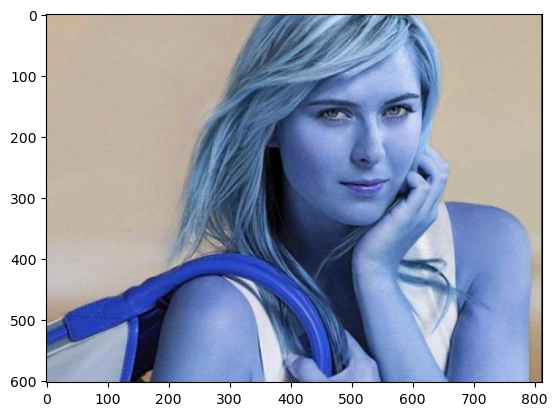

In [3]:
plt.imshow(img)

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(603, 813)

In [5]:
gray 

array([[ 16,  16,  16, ...,  16,  16,  16],
       [172, 171, 171, ..., 174, 174,  16],
       [172, 172, 172, ..., 174, 174,  16],
       ...,
       [169, 169, 169, ..., 147, 143,  16],
       [168, 167, 167, ..., 159, 144,  16],
       [167, 166, 166, ..., 159, 145,  16]], dtype=uint8)

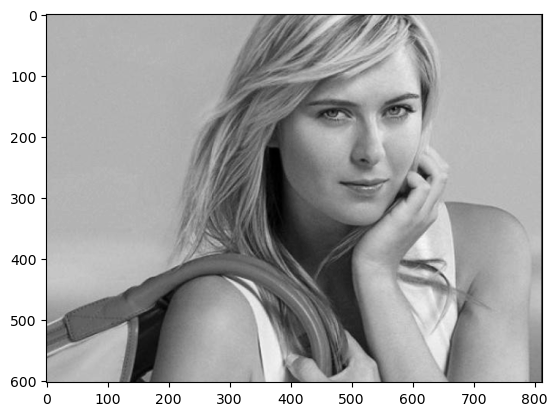

In [6]:
plt.imshow(gray, cmap='gray')

In [7]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[378,  49, 297, 297]])

In [8]:
(x, y, w, h) = faces[0]
x, y, w, h

(378, 49, 297, 297)

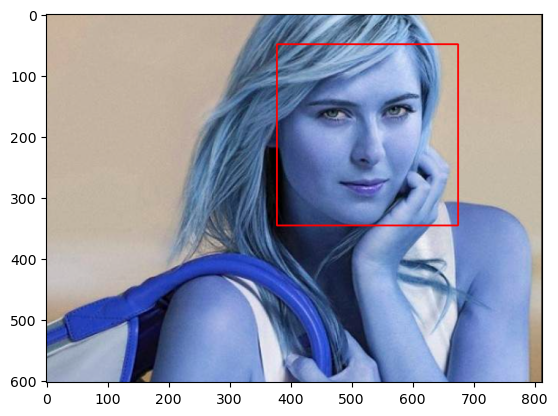

In [12]:
face_img = cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
plt.imshow(face_img)

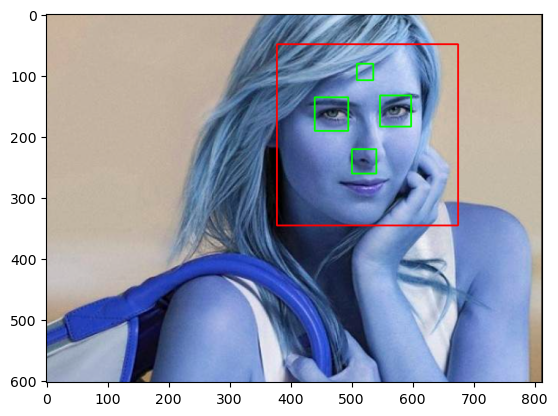

In [13]:
cv2.destroyAllWindows()
for(x, y, w, h) in faces:
    face_img = cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for(ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0, 255, 0), 2)
        
plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

In [ ]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray') # roi means region of interest
# roi_color sontains the image of the face, marked by the red revctangle

In [ ]:
cropped_img = np.array(roi_color)
cropped_img.shape